 Importing Libraries

In [37]:
#importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
# load and print Dataset
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# number of rows and columns
df.shape

(891, 12)

In [40]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
#checking the missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
#describe the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:

#replacing the missing values in "Age" column with mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [44]:
# replacing the missing values in "Embarked" column with mode value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [45]:
# replacing the missing values in "Cabin" column with mode value
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])


In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Data Visualization:


In [47]:
# finding the number of people survived and not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

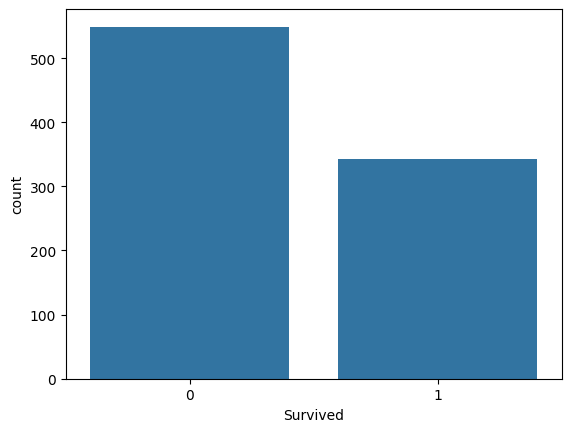

In [48]:
sns.countplot(x='Survived', data=df)


In [49]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

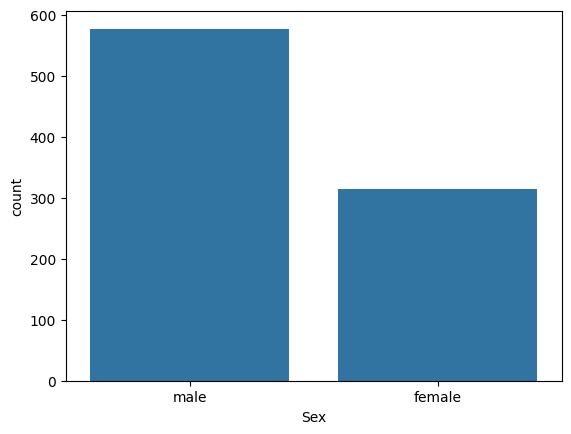

In [50]:
sns.countplot(x='Sex', data=df)


<Axes: xlabel='Sex', ylabel='count'>

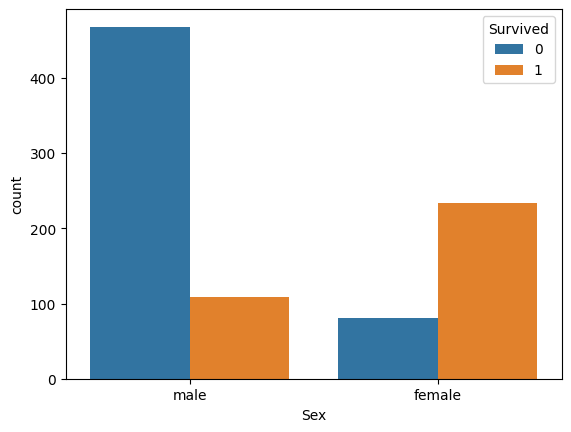

In [51]:
#number of survivors Gender Wise
sns.countplot(x='Sex',hue='Survived', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

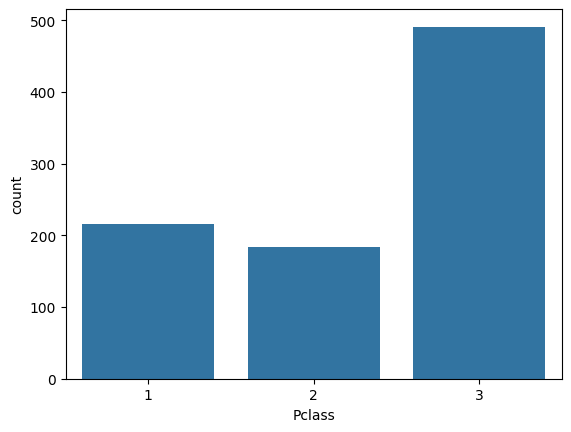

In [52]:
#plot for "Pclass" column
sns.countplot(x='Pclass', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

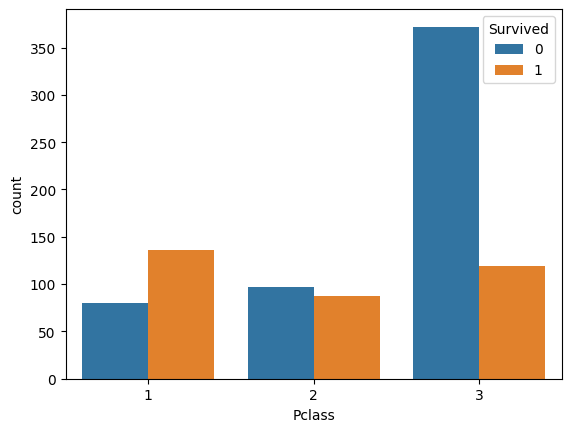

In [53]:
#number of survivors Pclass
sns.countplot(x='Pclass',hue='Survived', data=df)


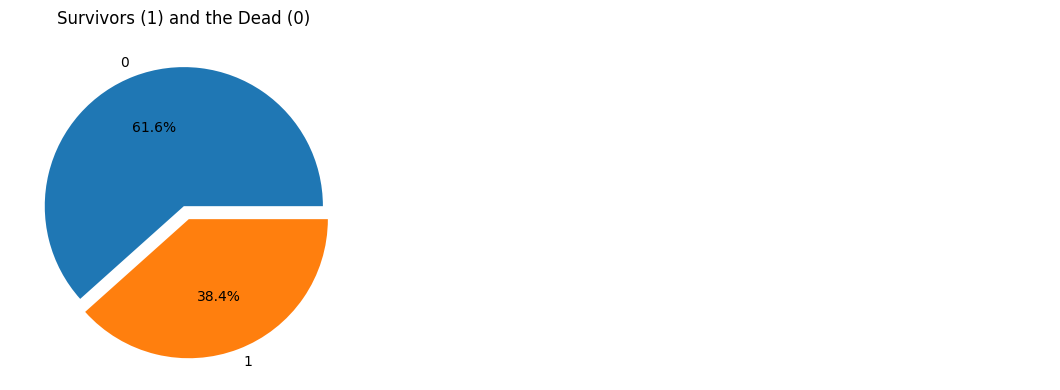

In [54]:

f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
df['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the Dead (0)')
ax[0].set_ylabel('')  
ax[1].axis('off')  
plt.tight_layout()  
plt.show()


In [55]:
X=df.drop("Cabin",axis=1)
Y=df.Cabin
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Encoding Categorical Variables:

In [ ]:

# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})





In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,0


Select the features 

In [58]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']


In [59]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare    Cabin  Embarked
0         3    0  22.000000      1      0   7.2500  B96 B98         0
1         1    1  38.000000      1      0  71.2833      C85         1
2         3    1  26.000000      0      0   7.9250  B96 B98         0
3         1    1  35.000000      1      0  53.1000     C123         0
4         3    0  35.000000      0      0   8.0500  B96 B98         0
..      ...  ...        ...    ...    ...      ...      ...       ...
886       2    0  27.000000      0      0  13.0000  B96 B98         0
887       1    1  19.000000      0      0  30.0000      B42         0
888       3    1  29.699118      1      2  23.4500  B96 B98         0
889       1    0  26.000000      0      0  30.0000     C148         1
890       3    0  32.000000      0      0   7.7500  B96 B98         2

[891 rows x 8 columns]


In [60]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Split Data into Training and Testing Sets

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [62]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


Model Training

Logistic Regression

In [63]:
model=LogisticRegression()

In [64]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)


X_train shape: (712, 8)
Y_train shape: (712,)


In [65]:
print(X_train.dtypes)  # For Pandas DataFrame
print(Y_train.dtypes)  # For Pandas Series


Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked      int64
dtype: object
int64


In [66]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train = encoder.fit_transform(X_train)


In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)


In [68]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)


In [69]:
try:
    model.fit(X_train, Y_train)
except ValueError as e:
    print(f"ValueError: {e}")


Model Evalution


Accuracy Score

In [70]:
X_train_prediction=model.predict(X_train)

In [71]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [72]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy Score of training data :',training_data_accuracy)

Accuracy Score of training data : 0.901685393258427
